In [89]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [91]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [92]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [93]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [94]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [95]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [96]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [97]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

Text(0, 0.5, 'Inches')

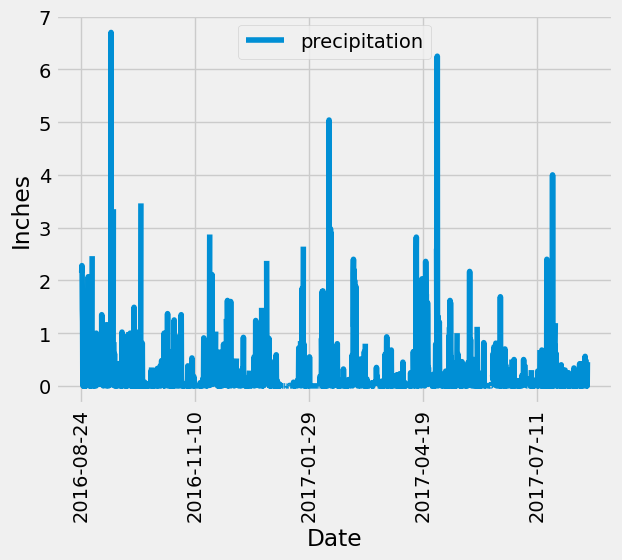

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
a_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = []
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= a_year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['date','precipitation'])

# Sort the dataframe by date
precipitation_df.set_index(precipitation_df['date'], inplace=True)
precipitation_df = precipitation_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')

In [99]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
total_stations

9

In [101]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
average = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()

print('Min: '+ str(min))
print('Max: '+ str(max))
print('Average: '+ str(average))

Min: 54.0
Max: 85.0
Average: 71.66378066378067


Text(0.5, 0, 'Temperature')

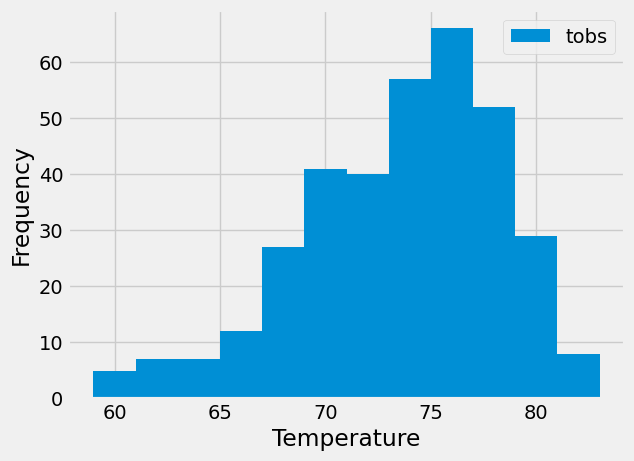

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= a_year_ago).all()
temperatures_df = pd.DataFrame(temperatures, columns=['tobs'])
temperatures_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [104]:
# Close Session
session.close()